In [1]:
# generating fake data
from sklearn.datasets import make_blobs
X,Y= make_blobs(n_samples=400, centers=2, n_features=2, cluster_std=5, random_state=11)
m=200

# Visualizing data

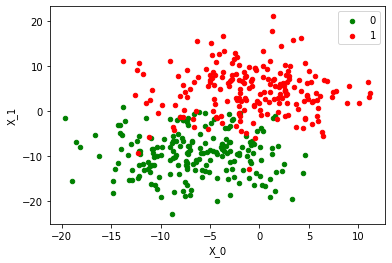

In [2]:
import matplotlib.pyplot as plt
from pandas import DataFrame

# Creating dataframe from array usinf dictionary method.
df= DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))

#creating groupby object to use in plotting.
grouped= df.groupby("label")

## Creating subplot objects for creating charts in future.
fig, ax= plt.subplots()

## Creating color key for labels.
colors = {1:"red",0:"green"}

##Using the group object to plot a chart for each group.

for key, group in grouped:
    
    group.plot(ax=ax, x="x", y="y", kind="scatter", label=key, color=colors[key])

plt.xlabel("X_0")
plt.ylabel("X_1")
plt.show()


# Logistic regression model

In [3]:
import numpy as np

def LogR(z):    
    return( 1/(1 + np.exp(-z)))

In [4]:
def lineEq(w):
    
    z=np.array(w[0]+ w[1]*np.array(X[:,0]) + w[2]*np.array(X[:,1]))    
    return LogR(z)

# Cost function: Binary cross entropy

In [1]:
def costFunction():
    
    return (-1*(Y*np.log(lineEq(w)) + (1-Y)*(1-np.log(lineEq(w)))))

# Gradient

In [6]:
def gradient(w):
    
    g=[0]*3
    
    g[0]= -1*(np.sum(Y*(1-lineEq(w)) -(1-Y)*(lineEq(w)) ))
    g[1]=  -1*(np.sum(Y*(1-lineEq(w))*X[:,0] -(1-Y)*(lineEq(w))*X[:,0] ))
    g[2]=  -1*(np.sum(Y*(1-lineEq(w))*X[:,1] -(1-Y)*(lineEq(w))*X[:,1] ))
    
    return(g)

In [7]:
def descent(w_prev, w_new, lr):         
    
    j=0
    
    print(w_prev)
    print(w_new)
    
    while True:
           
        w_prev=w_new[:]        
        
        print(type(lr*gradient(w_prev)[0]))
        print(w_prev[0])
        w_new[0]=w_prev[0]- lr*gradient(w_prev)[0]
        w_new[1]=w_prev[1]- lr*gradient(w_prev)[1]
        w_new[2]=w_prev[2]- lr*gradient(w_prev)[2]
        
        print("j=",j)
        #print(w_prev)
        #print(w_new)        
        
        if ((w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 + (w_new[2]-w_prev[2])**2) <= pow(10,-6):                        
            print("The lowest value of cost function is",costFunction(w_new))
            print("And the corresponding weights are",w_new)
            return w_new
        elif j>500:
            return w_new       
        j+=1    

In [10]:
w=descent([0,1,2,],[0,1,2,],.3)

[0, 1, 2]
[0, 1, 2]
<class 'numpy.float64'>
0
j= 0
<class 'numpy.float64'>
13.743261946587067
j= 1
<class 'numpy.float64'>
-10.786607359097657
j= 2
<class 'numpy.float64'>
2.713392641915691
j= 3
<class 'numpy.float64'>
16.21339264191569
j= 4
<class 'numpy.float64'>
29.41340507257909
j= 5
<class 'numpy.float64'>
42.613405072579084
j= 6
<class 'numpy.float64'>
56.11340507257924
j= 7
<class 'numpy.float64'>
69.61340507257924
j= 8
<class 'numpy.float64'>
82.51340507264311
j= 9
<class 'numpy.float64'>
95.11340506953044
j= 10
<class 'numpy.float64'>
107.41340506953044
j= 11
<class 'numpy.float64'>
119.15016867318609
j= 12
<class 'numpy.float64'>
130.25089674857225
j= 13
<class 'numpy.float64'>
141.17794486742167
j= 14
<class 'numpy.float64'>
151.2699163954831
j= 15
<class 'numpy.float64'>
159.9893002842263
j= 16
<class 'numpy.float64'>
168.68930028422838
j= 17
<class 'numpy.float64'>
177.38927666307202
j= 18
<class 'numpy.float64'>
185.78920595420473
j= 19
<class 'numpy.float64'>
192.6925811

<ipython-input-3-5aff51b166a1>:4: RuntimeWarning: overflow encountered in exp
  return( 1/(1 + np.exp(-z)))


j= 123
<class 'numpy.float64'>
236.60123551840013
j= 124
<class 'numpy.float64'>
249.501235479346
j= 125
<class 'numpy.float64'>
253.69261060223485
j= 126
<class 'numpy.float64'>
251.08441946477677
j= 127
<class 'numpy.float64'>
253.10976167851408
j= 128
<class 'numpy.float64'>
244.12542772348326
j= 129
<class 'numpy.float64'>
251.96589514200082
j= 130
<class 'numpy.float64'>
239.96731235885815
j= 131
<class 'numpy.float64'>
251.89706539093433
j= 132
<class 'numpy.float64'>
250.2283804149187
j= 133
<class 'numpy.float64'>
252.0598881144274
j= 134
<class 'numpy.float64'>
244.5669519886342
j= 135
<class 'numpy.float64'>
249.96867779005748
j= 136
<class 'numpy.float64'>
234.12482483350308
j= 137
<class 'numpy.float64'>
247.02482483350371
j= 138
<class 'numpy.float64'>
251.83014141316588
j= 139
<class 'numpy.float64'>
249.0817865784151
j= 140
<class 'numpy.float64'>
254.33781601571206
j= 141
<class 'numpy.float64'>
239.88675912074999
j= 142
<class 'numpy.float64'>
252.78609348010843
j= 143

j= 383
<class 'numpy.float64'>
244.66066809978798
j= 384
<class 'numpy.float64'>
254.55887844727232
j= 385
<class 'numpy.float64'>
248.9854834749304
j= 386
<class 'numpy.float64'>
255.87409780343137
j= 387
<class 'numpy.float64'>
243.8019390238859
j= 388
<class 'numpy.float64'>
255.47005256105544
j= 389
<class 'numpy.float64'>
252.76950641090468
j= 390
<class 'numpy.float64'>
257.76270107535527
j= 391
<class 'numpy.float64'>
245.22406348575575
j= 392
<class 'numpy.float64'>
257.52408606602813
j= 393
<class 'numpy.float64'>
257.7660046151801
j= 394
<class 'numpy.float64'>
256.61838770856383
j= 395
<class 'numpy.float64'>
253.6669980298949
j= 396
<class 'numpy.float64'>
253.09969141039625
j= 397
<class 'numpy.float64'>
244.45026995546908
j= 398
<class 'numpy.float64'>
250.0799264411619
j= 399
<class 'numpy.float64'>
233.60269364647712
j= 400
<class 'numpy.float64'>
246.50269364647718
j= 401
<class 'numpy.float64'>
251.3366528524785
j= 402
<class 'numpy.float64'>
249.2348572857936
j= 403


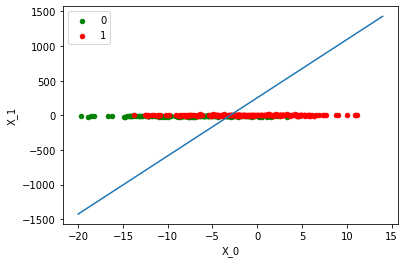

In [15]:

def graph(formula, x_range):
    x= np.array(x_range)
    y= formula(x)
    plt.plot(x,y)
    
def formula(x):
    return (w[0]+w[1]*x +w[2]*x)
    
    
# Creating dataframe from array usinf dictionary method.
df= DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))

#creating groupby object to use in plotting.
grouped= df.groupby("label")

## Creating subplot objects for creating charts in future.
fig, ax= plt.subplots()

## Creating color key for labels.
colors = {1:"red",0:"green"}

##Using the group object to plot a chart for each group.

for key, group in grouped:
    
    group.plot(ax=ax, x="x", y="y", kind="scatter", label=key, color=colors[key])

graph(formula, range(-20, 15))
plt.xlabel("X_0")
plt.ylabel("X_1")
plt.show()
